In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import seaborn as sns

In [2]:
dfx=pd.read_csv('multivariate regression.csv')
dfz=pd.read_csv('multivariatetest.csv')

In [3]:
X=dfx.values
#X=(X-np.mean(X))/np.std(X)
X=X[:,:5]
Y=X[:,4:]
#Y=(Y-np.mean(Y))/np.std(Y)
xtest=dfz.values
#xtest=(xtest-np.mean(xtest))/np.std(xtest)
print(X.shape) 
print(Y.shape) 
print(xtest.shape)

(1600, 5)
(1600, 1)
(400, 5)


In [4]:
print(X)

[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [-1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [-1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]


In [5]:
ones = np.ones((X.shape[0],1))
ones.shape, X.shape
X_appended = np.append(ones, X, axis = 1)

In [6]:
X= X_appended.copy()

In [7]:
ones=np.ones((xtest.shape[0],1))
x_appended=np.append(ones,xtest,axis=1)
xtest=x_appended.copy()

In [8]:
print(X.shape)
print(Y.shape)
print(xtest.shape)

(1600, 6)
(1600, 1)
(400, 6)


In [9]:
def hypothesis(X,theta):
        return np.dot(theta.T,X)

In [10]:
#def sum(theta):
    #sum_=0
    #for ix in range(theta.shape[0]):
        #sum_=sum_+(theta[ix])**2
        
    #return sum_    

In [11]:
def error(X,Y,theta):
    error=0
    for ix in range(X.shape[0]):
            hx=hypothesis(X[ix],theta)
            error+=(hx-Y[ix])**2
        
    return error


In [12]:
def batch_gradient(X,Y,theta,batch_size=100):
    m=Y.shape[0]
    indices=np.arange(m)
    np.random.shuffle(indices)
    indices=indices[:batch_size]
    grad=np.zeros((6,))
    for i in indices:
        h=hypothesis(X[i],theta)
        for j in range(X.shape[1]):
            grad[j]+=(h-Y[i])*X[i][j]
            
    return grad*0.5    

In [13]:
def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((6,))
    for i in range(m):
        hx=hypothesis(X[i],theta)
        for j in range(X.shape[1]):
            #hx=hypothesis(X[i],theta)
            grad[j]+=(hx-Y[i])*X[i][j]
            #grad_list.append(grad)        
    return grad   

In [14]:
def gradientDescent(X,Y,learning_rate=0.01):
    itr=0
    error_list=[]
    theta_list=[]
    theta=np.zeros((6,))
    e=error(X,Y,theta)
    while(itr<=100):
        grad=batch_gradient(X,Y,theta)
        #error_list.append(e)
        for j in range(X.shape[1]):
            theta[j]=theta[j]-learning_rate*(grad[j])
            theta_list.append(theta)
        ne=error(X,Y,theta)
        tmp=e
        error_list.append(ne)
        itr+=1
    return theta,error_list,theta_list
    
    

In [15]:
theta,error_list,theta_list = gradientDescent(X,Y)
#error_list.shape
error_list=np.array(error_list)
print(error_list)
print(theta)
print(theta.shape)


[[3.58448850e+02]
 [8.91560703e+01]
 [2.47633569e+01]
 [7.73712714e+00]
 [2.75643417e+00]
 [8.12866837e-01]
 [2.53590474e-01]
 [8.47666434e-02]
 [2.80954428e-02]
 [1.33971285e-02]
 [3.48517175e-03]
 [1.26228333e-03]
 [3.40107602e-04]
 [1.25715166e-04]
 [5.25204687e-05]
 [1.40740487e-05]
 [5.73338188e-06]
 [1.70104611e-06]
 [6.18099283e-07]
 [2.73034202e-07]
 [1.22773263e-07]
 [3.86486518e-08]
 [1.41875103e-08]
 [4.08532597e-09]
 [1.16292622e-09]
 [3.63422449e-10]
 [7.26500113e-11]
 [1.15643056e-11]
 [3.49439426e-12]
 [1.07108545e-12]
 [2.54721998e-13]
 [1.07746364e-13]
 [5.47652473e-14]
 [1.54927825e-14]
 [6.41982897e-15]
 [1.49857229e-15]
 [4.91134522e-16]
 [1.15565443e-16]
 [3.05721758e-17]
 [1.00743366e-17]
 [3.65785583e-18]
 [9.25296620e-19]
 [3.26696336e-19]
 [6.88449173e-20]
 [1.80699388e-20]
 [5.40162463e-21]
 [2.18555066e-21]
 [5.47699553e-22]
 [1.61688061e-22]
 [4.00551131e-23]
 [1.00748165e-23]
 [3.58711646e-24]
 [1.02499483e-24]
 [2.10679565e-25]
 [6.98948948e-26]
 [1.888680

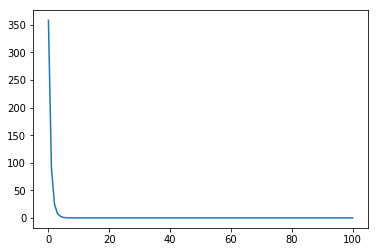

In [16]:
plt.plot(error_list)
plt.show()

In [18]:
ss_t=0
ss_r=0
coff=0
for i in range(X.shape[0]):
    ss_t+=(Y[i]-np.mean(Y))**2
    ss_r+=(Y[i]-hypothesis(X[i],theta))**2
coff=1-(ss_r/ss_t)
print(coff)

[1.]


In [19]:
y_pred=[]
ide=0
id=[]
for ix in range(xtest.shape[0]):
    y_pred.append(hypothesis(xtest[ix],theta))
    id.append(ide)
    ide+=1
y_pred =np.array(y_pred)
id=np.array(id)
print(y_pred)
print(y_pred.shape)

[-9.80502790e-01 -3.55489211e-01  4.55201351e-01 -1.31428633e+00
  4.11925419e-01  3.34767132e-01 -1.03803115e+00 -5.85592253e-01
  2.12006003e-01 -8.55755633e-01 -1.18244215e-01  1.00917976e+00
 -8.47442167e-01 -3.61030670e-01  1.08270618e+00  7.20733293e-01
 -1.88953941e-01 -1.25958330e+00 -4.58119771e-01  5.68131459e-01
  6.57929411e-01  9.08110324e-02  4.36008257e-01  2.68175812e-01
  1.56299721e+00 -2.46691692e-01  4.46150579e-01  1.40881836e-01
  1.34283116e-01 -1.70832401e+00  2.87038209e+00 -3.09522205e-02
  1.01064232e-01 -1.34698632e+00  3.05382703e-02 -9.66500426e-01
  6.32542048e-01 -1.27206890e+00  2.06214024e-01  2.57644017e+00
  3.64702317e-01 -4.06576560e-02  9.95208179e-01  3.79639108e-01
  1.33396888e+00 -1.15340555e+00  1.44363473e+00 -1.18810922e+00
  5.98537368e-01  1.05494773e+00 -3.30966521e-01 -8.64969977e-03
  8.44194598e-01  1.29182486e+00  3.49686929e-01 -6.08678276e-01
 -4.26857477e-01  1.50133631e-01 -6.47841721e-01 -1.20020353e+00
  3.53637073e-01  1.85369

In [20]:
y_pred=pd.DataFrame(y_pred,columns=["target"])

In [21]:
y_pred.to_csv('linear regression.csv',index=True)

In [22]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1,normalize=True)
clf.fit(X,Y)
clf.score(X,Y)
ypred=clf.predict(xtest)

In [23]:
ypred=pd.DataFrame(ypred,columns=["target"])

ypred.to_csv('linearlasso.csv',index=True)